In [21]:
import numpy as np
import pandas as pd
from quasinet.qnet import qdistance, load_qnet
from emergenet.domseq import DomSeq, save_model, load_model
import os
import glob

In [22]:
Q_PATH='../../paper_data_v2//irat_enet/enet_models/current_enets/h1n1_ha.joblib.gz'
qnet__=load_qnet(Q_PATH,gz=True)

In [23]:
import multiprocessing as mulpro
import itertools
import shap

In [24]:
df=pd.read_csv('../../paper_data_v2/irat_enet/results/animal_predictions/combined_results.csv')

In [25]:
df_=df[df.subtype=='H1N1'][['ha_accession','ha','emergence_risk']].set_index('ha_accession').sort_values('emergence_risk')
low_risk_seq=df_[df_.emergence_risk<6].ha.values
high_risk_seq=df_[df_.emergence_risk>6.5].ha.values

S0=[np.array(list(x)) for x in low_risk_seq]
slow=pd.DataFrame(S0).mode().values[0]
shigh=np.array([np.array(list(x)) for x in high_risk_seq])

In [26]:
s0__=slow
def fpar(s):
    return qdistance(s0__,s,qnet__,qnet__)
def f(s_array):
    pool = mulpro.Pool(processes=10)
    return np.array(pool.map(fpar, s_array))    

In [27]:
explainer = shap.KernelExplainer(f,np.array([slow]))

In [28]:
S_=np.array([x for x in shigh if np.random.rand()<.2 ])
shap_values = explainer.shap_values(S_, nsamples=550)

  0%|          | 0/51 [00:00<?, ?it/s]

In [29]:
shp1=pd.DataFrame(pd.DataFrame(shap_values).abs().mean().sort_values(ascending=False),columns=['shp_h1n1'])
shp1.index.name='H1N1_features'

In [30]:
Q_PATH='../../paper_data_v2//irat_enet/enet_models/current_enets/h3n2_ha.joblib.gz'
qnet__=load_qnet(Q_PATH,gz=True)


In [31]:
df_=df[df.subtype=='H3N2'][['ha_accession','ha','emergence_risk']].set_index('ha_accession').sort_values('emergence_risk')
low_risk_seq=df_[df_.emergence_risk<6].ha.values
high_risk_seq=df_[df_.emergence_risk>6.5].ha.values

S0=[np.array(list(x)) for x in low_risk_seq]
slow=pd.DataFrame(S0).mode().values[0]
shigh=np.array([np.array(list(x)) for x in high_risk_seq])

In [32]:
s0__=slow
def fpar(s):
    return qdistance(s0__,s,qnet__,qnet__)
def f(s_array):
    pool = mulpro.Pool(processes=10)
    return np.array(pool.map(fpar, s_array))    

In [33]:
explainer = shap.KernelExplainer(f,np.array([slow]))

In [34]:
S_=np.array([x for x in shigh if np.random.rand()<.2 ])
shap_values = explainer.shap_values(S_, nsamples=550)

  0%|          | 0/38 [00:00<?, ?it/s]

In [35]:
shp2=pd.DataFrame(pd.DataFrame(shap_values).abs().mean().sort_values(ascending=False),columns=['shp_h3n2'])
shp2.index.name='H3N2_features'

In [36]:
shp1.to_csv('lowhighrisk_H1N1.csv')
shp2.to_csv('lowhighrisk_H3N2.csv')


<AxesSubplot:xlabel='H1N1_features'>

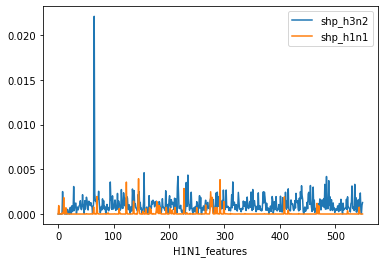

In [40]:
ax=shp2.sort_index().ewm(alpha=.95).mean().plot(logy=False)
shp1.sort_index().ewm(alpha=.95).mean().plot(logy=False,ax=ax)

In [38]:
shp2

,shp_h3n2
H3N2_features,
65,0.023221
155,0.004798
234,0.004545
484,0.004392
216,0.004280
...,...
23,0.000000
20,0.000000
16,0.000000


In [59]:
df_=df[df.subtype=='H3N2'][['ha_accession','ha','emergence_risk']].set_index('ha_accession').sort_values('emergence_risk')
lf=df_[df_.emergence_risk<6]
lf.head(1).ha.values[0]

'MKTIIALSYIFCLAFSQDLSGSNNNNTATLCLGHHAVPNGTLVKTITDDQIEVTNATELVQSSSTGKICNNPHRILDGRDCTLIDALLGDPHCDVFQDVTWDLFVERSNALSNCYPYDVPDYASLRSLVASSGTLEFITEGFTWTGVTQNGGSGACKRGPANGFFSRLNWLTKSGSAYPVLNVTMPNNDNFDKLYIWGVHHPSTNQEQTNLYVQASGRVTVSTRRSQQTIIPNIGSRPWVRGQSGRISIYWTVVKPGDVLVINSNGNLIAPRGYFKMRAGKSSIMRSDAPIDTCISECITPNGSIPNDKPFQNVNKITYGACPKYVKQNTLKLATGMRNVPEKQARGLFGAIAGFIENGWEGMIDGWYGFRHQNSEGTGQAADLKSTQAAIDQINGKLNRVIEKTNEKFHQIEKEFSEVEGRIQDLEKYVEDTKIDLWSYNAELLVALENQHTIDLTDSEMNKLFEKTRRQLRENAEDMGNGCFKIYHKCDNACIDSIRNGTYDHDIYRDEALNNRFQIKGVELKSGYKDWILWISFAISCFLLCVVLLG'

In [57]:
lf.ha.values[0][60:70]

'SSSTGRICNS'

In [61]:
shp1

,shp_h1n1
H1N1_features,
145,0.004103
292,0.004045
123,0.003762
227,0.003003
275,0.002602
...,...
217,0.000000
215,0.000000
210,0.000000
